# Finite Difference Model

Use Finite Difference method to value an option.

The underlying code used is based on the fd_runner method [here](https://github.com/domokane/CompFin/blob/main/Week%204/xladdin/Utility/kBlack.cpp)

In [1]:
from copy import copy

import numpy as np
import matplotlib.pyplot as plt

from financepy.models.finite_difference import (
    dx, dxx, fd_roll_backwards, fd_roll_forwards, black_scholes_finite_difference)
from financepy.utils.math import band_matrix_multiplication, solve_tridiagonal_matrix
from financepy.utils.date import Date
from financepy.utils.global_types import OptionTypes
from financepy.products.equity.equity_vanilla_option import EquityVanillaOption
from financepy.market.curves.discount_curve_flat import DiscountCurveFlat

####################################################################
# FINANCEPY BETA Version 0.270 - This build:  26 Feb 2023 at 19:12 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



In [2]:
expiry_date = Date(1, 7, 2015)
strike_price = 100.0
option_type = OptionTypes.EUROPEAN_CALL
call_option = EquityVanillaOption(
    expiry_date, strike_price, option_type)

valuation_date = Date(1, 1, 2015)
stock_price = 100
volatility = 0.30
interest_rate = 0.05
dividend_yield = 0.01
discount_curve = DiscountCurveFlat(valuation_date, interest_rate)
dividend_curve = DiscountCurveFlat(valuation_date, dividend_yield)

num_std = 5
num_samples = 200
num_steps = 50

In [3]:
res, v = black_scholes_finite_difference(stock_price=stock_price, sigma=volatility,
                                         expiry_date=expiry_date, valuation_date=valuation_date,
                                         strike_price=100.0, discount_curve=discount_curve,
                                         dividend_curve=dividend_curve, digital=0,
                                         option_type=option_type, smooth=0, theta=0.5, wind=0,
                                         num_std=num_std, num_steps=num_steps, num_samples=num_samples,
                                         update=False)

In [4]:
# Create samples (this is done in black_scholes_finite_difference
# but we do it here for plotting)
time_to_expiry = (expiry_date - valuation_date) / 365
std = volatility * (time_to_expiry ** 0.5)
xl = -num_std * std
xu = num_std * std
d_x = (xu - xl) / max(1, num_samples)
num_samples = 1 if num_samples <= 0 or xl == xu else num_samples + 1
s = np.zeros(num_samples)
s[0] = stock_price * np.exp(xl)
ds = np.exp(d_x)
for i in range(1, num_samples):
    s[i] = s[i - 1] * ds

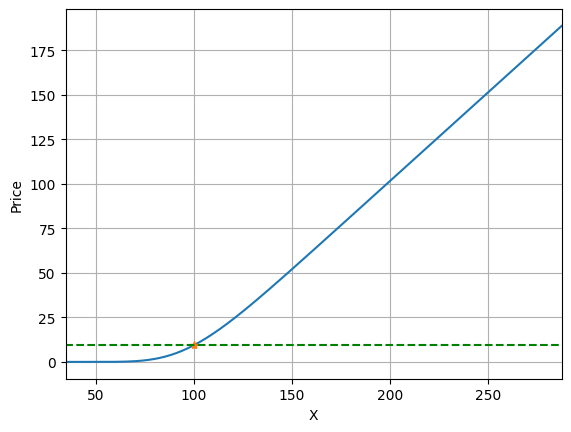

In [5]:
plt.plot(s, res)
plt.plot(s[len(s)//2], v, "*")
plt.hlines(v, 0, s[-1],"g", "dashed")
plt.xlabel("X")
plt.ylabel("Price")
plt.xlim((s[0], s[-1]))
plt.grid()

In [10]:
print(f"Option value is ${v:.2f}")

Option value is $9.30
